ロジスティック回帰その1

In [161]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [163]:
from sklearn import metrics

In [164]:
import statsmodels.api as sm

In [165]:
#import pandas.tseries as sm

In [166]:
def logistic(t):
    return 1.0/(1+math.exp(-1.0*t))

In [167]:
t=np.linspace(-6,6,500)

Text(0.5,1,'Logistic Function')

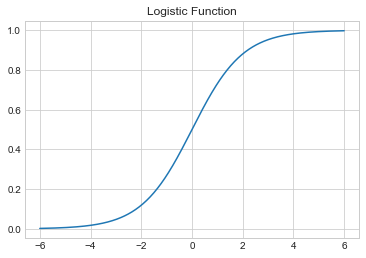

In [168]:
y=np.array([logistic(ele) for ele in t])
plt.plot(t,y)
plt.title('Logistic Function')

ロジスティック回帰その2

In [169]:
df=sm.datasets.fair.load_pandas().data

In [170]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [171]:
def affir_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [172]:
df['Had_Affair']=df['affairs'].apply(affir_check)

In [173]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [174]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


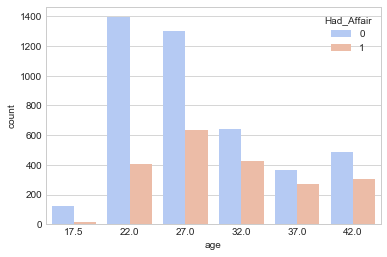

In [175]:
sns.countplot('age',data=df.sort_values('age'),hue='Had_Affair',palette='coolwarm')

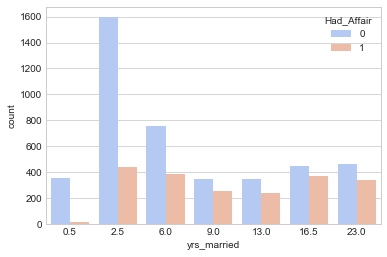

In [176]:
sns.countplot('yrs_married',data=df.sort_values('yrs_married'),hue='Had_Affair',palette='coolwarm')

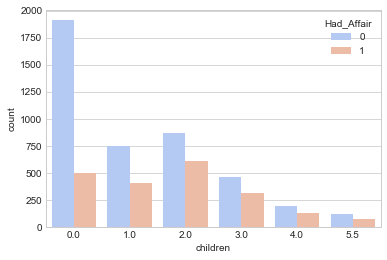

In [177]:
sns.countplot('children',data=df.sort_values('children'),hue='Had_Affair',palette='coolwarm')

ロジスティック回帰その3

In [178]:
occ_dummies=pd.get_dummies(df.occupation)

In [179]:
hus_occ_dummies=pd.get_dummies(df.occupation_husb)

In [180]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [181]:
hus_occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [182]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [183]:
occ_dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [184]:
hus_occ_dummies.head()

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [185]:
X=df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [186]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [187]:
X=pd.concat([X,dummies],axis=1)

In [188]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [189]:
Y=df.Had_Affair

In [190]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [191]:
X=X.drop('occ1',axis=1)

In [192]:
X=X.drop('hocc1',axis=1)

In [193]:
X=X.drop('affairs',axis=1)

In [194]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [195]:
Y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
6336    0
6337    0
6338    0
6339    0
6340    0
6341    0
6342    0
6343    0
6344    0
6345    0
6346    0
6347    0
6348    0
6349    0
6350    0
6351    0
6352    0
6353    0
6354    0
6355    0
6356    0
6357    0
6358    0
6359    0
6360    0
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In [196]:
Y.values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [197]:
Y=np.ravel(Y)

In [198]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

ロジスティック回帰その4

In [199]:
log_model=LogisticRegression()

In [200]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [201]:
log_model.score(X,Y)

0.72588752748978946

In [202]:
coeff_df=DataFrame([X.columns,log_model.coef_[0]]).T

In [203]:
coeff_df

,0,1
0,rate_marriage,-0.697885
1,age,-0.056347
2,yrs_married,0.103906
3,children,0.0181728
4,religious,-0.368496
5,educ,0.00878983
6,occ2,0.297979
7,occ3,0.607916
8,occ4,0.346038
9,occ5,0.942365


In [204]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [205]:
log_model2=LogisticRegression()

In [206]:
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [207]:
class_predict=log_model2.predict(X_test)

In [208]:
class_predict

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [209]:
metrics.accuracy_score(Y_test,class_predict)

0.72801507537688437